In [1]:
% Machine Learning Online Class
%  Exercise 8 | Anomaly Detection and Collaborative Filtering
%
%  Instructions
%  ------------
%
%  This file contains code that helps you get started on the
%  exercise. You will need to complete the following functions:
%
%     estimateGaussian.m
%     selectThreshold.m
%     cofiCostFunc.m
%
%  For this exercise, you will not need to change any code in this file,
%  or any other files other than those mentioned above.
%

%% Initialization
clear ; close all; clc

Visualizing example dataset for outlier detection.



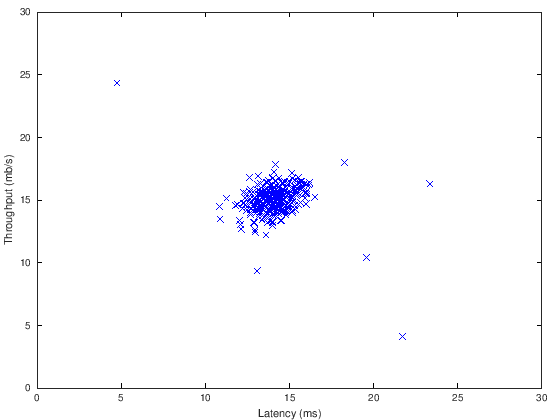

In [2]:
%% ================== Part 1: Load Example Dataset  ===================
%  We start this exercise by using a small dataset that is easy to
%  visualize.
%
%  Our example case consists of 2 network server statistics across
%  several machines: the latency and throughput of each machine.
%  This exercise will help us find possibly faulty (or very fast) machines.
%

fprintf('Visualizing example dataset for outlier detection.\n\n');

%  The following command loads the dataset. You should now have the
%  variables X, Xval, yval in your environment
load('ex8data1.mat');

%  Visualize the example dataset
plot(X(:, 1), X(:, 2), 'bx');
axis([0 30 0 30]);
xlabel('Latency (ms)');
ylabel('Throughput (mb/s)');

Visualizing Gaussian fit.



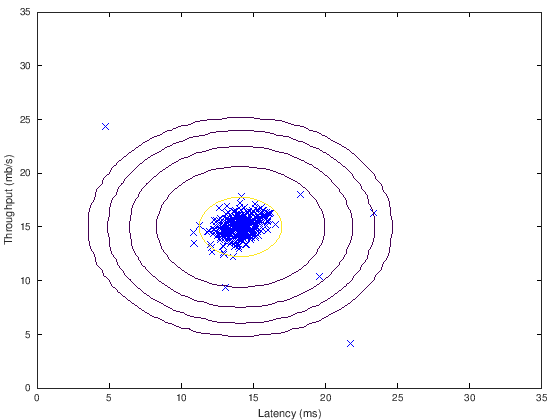

In [5]:
%% ================== Part 2: Estimate the dataset statistics ===================
%  For this exercise, we assume a Gaussian distribution for the dataset.
%
%  We first estimate the parameters of our assumed Gaussian distribution, 
%  then compute the probabilities for each of the points and then visualize 
%  both the overall distribution and where each of the points falls in 
%  terms of that distribution.
%
fprintf('Visualizing Gaussian fit.\n\n');

%  Estimate my and sigma2
[mu sigma2] = estimateGaussian(X);

%  Returns the density of the multivariate normal at each data point (row) 
%  of X
p = multivariateGaussian(X, mu, sigma2);

%  Visualize the fit
visualizeFit(X,  mu, sigma2);
xlabel('Latency (ms)');
ylabel('Throughput (mb/s)');



In [ ]:
%% ================== Part 3: Find Outliers ===================
%  Now you will find a good epsilon threshold using a cross-validation set
%  probabilities given the estimated Gaussian distribution
% 

pval = multivariateGaussian(Xval, mu, sigma2);

[epsilon F1] = selectThreshold(yval, pval);
fprintf('Best epsilon found using cross-validation: %e\n', epsilon);
fprintf('Best F1 on Cross Validation Set:  %f\n', F1);
fprintf('   (you should see a value epsilon of about 8.99e-05)\n');
fprintf('   (you should see a Best F1 value of  0.875000)\n\n');

%  Find the outliers in the training set and plot the
outliers = find(p < epsilon);

%  Draw a red circle around those outliers
hold on
plot(X(outliers, 1), X(outliers, 2), 'ro', 'LineWidth', 2, 'MarkerSize', 10);
hold off

In [ ]:
%% ================== Part 4: Multidimensional Outliers ===================
%  We will now use the code from the previous part and apply it to a 
%  harder problem in which more features describe each datapoint and only 
%  some features indicate whether a point is an outlier.
%

%  Loads the second dataset. You should now have the
%  variables X, Xval, yval in your environment
load('ex8data2.mat');

%  Apply the same steps to the larger dataset
[mu sigma2] = estimateGaussian(X);

%  Training set 
p = multivariateGaussian(X, mu, sigma2);

%  Cross-validation set
pval = multivariateGaussian(Xval, mu, sigma2);

%  Find the best threshold
[epsilon F1] = selectThreshold(yval, pval);

fprintf('Best epsilon found using cross-validation: %e\n', epsilon);
fprintf('Best F1 on Cross Validation Set:  %f\n', F1);
fprintf('   (you should see a value epsilon of about 1.38e-18)\n');
fprintf('   (you should see a Best F1 value of 0.615385)\n');
fprintf('# Outliers found: %d\n\n', sum(p < epsilon));